In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import joblib, scipy, sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter
#from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


In [3]:
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
from sklearn.metrics import plot_confusion_matrix

In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_csv('cirrhosis.csv')

In [8]:
df.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [9]:
df.drop(['ID'],axis=1,inplace=True)

In [10]:
df.shape

(418, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [12]:
df.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     41.250000    871.500000   80.600000      84.250000  188.500000   
50%     73.000000   1259.000000  114.700000     108.000000  251.000000   
75%    123.000000   1980.000000  151.900000     151.000000  318.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   416.000000  412.000000  
mean     10.731731    3.024272  
std       1.022000    0.882042  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

In [13]:
df.isnull().sum() / len(df) * 100

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

In [14]:
df[df.duplicated()]

Empty DataFrame
Columns: [N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []

N_Days
Skewness: 0.4726020506759292
Kurtosis: -0.4821388331042038


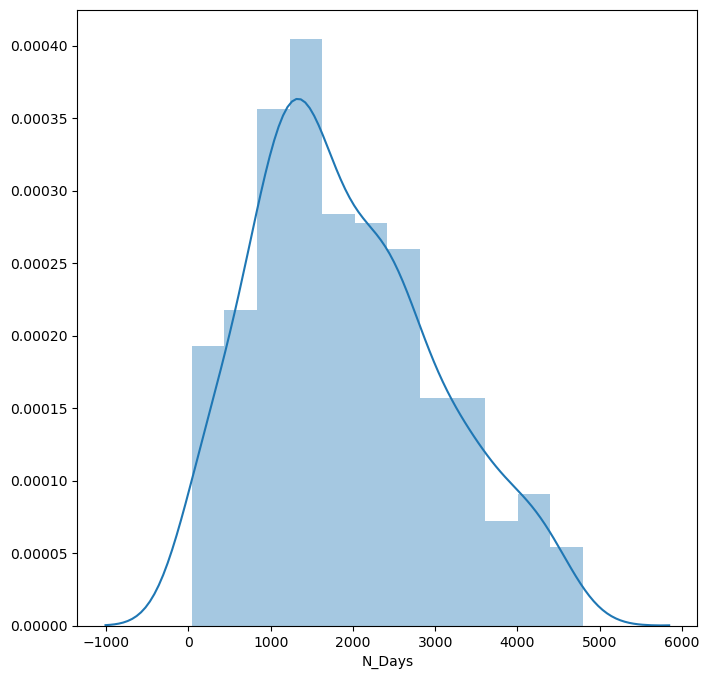

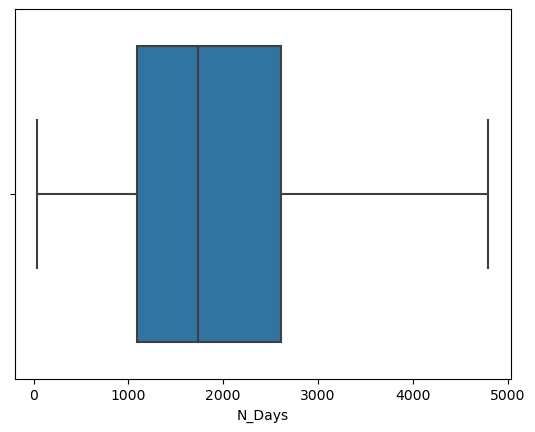

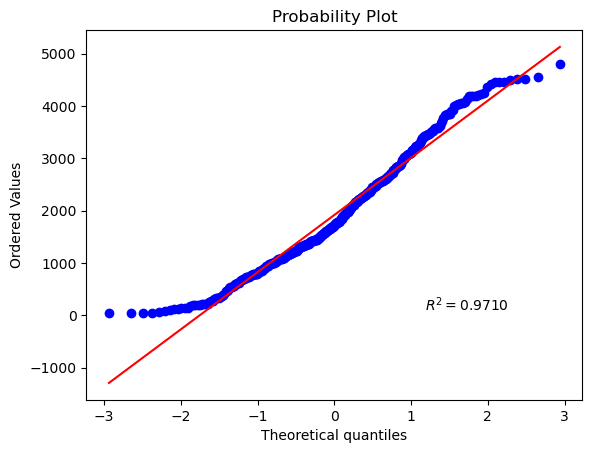

Age
Skewness: 0.08685015608405514
Kurtosis: -0.616730132346194


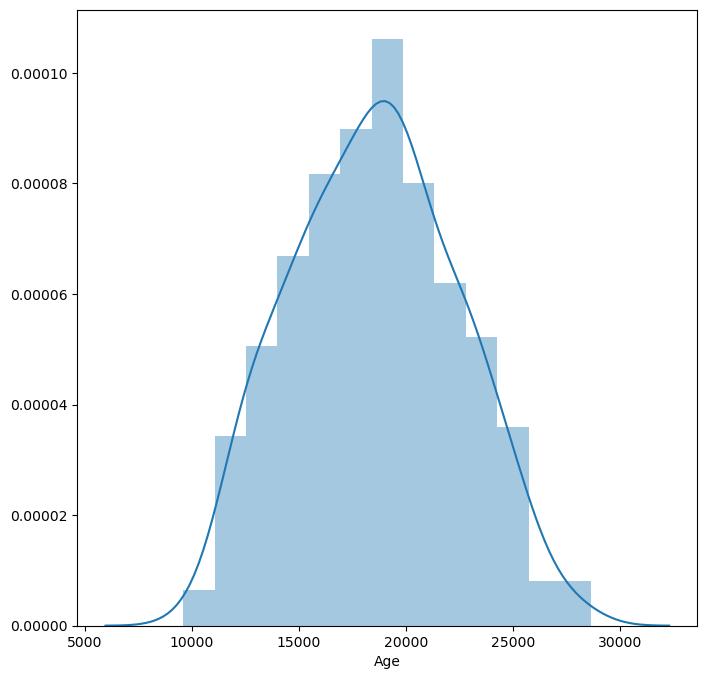

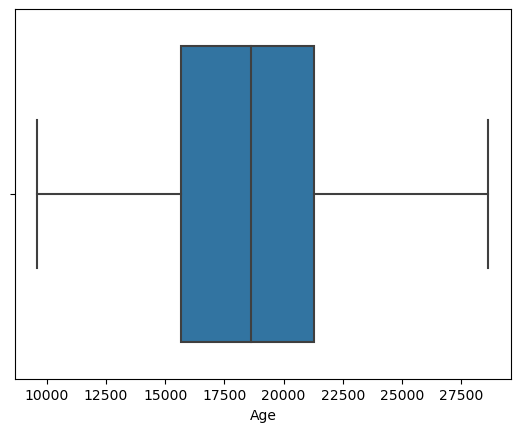

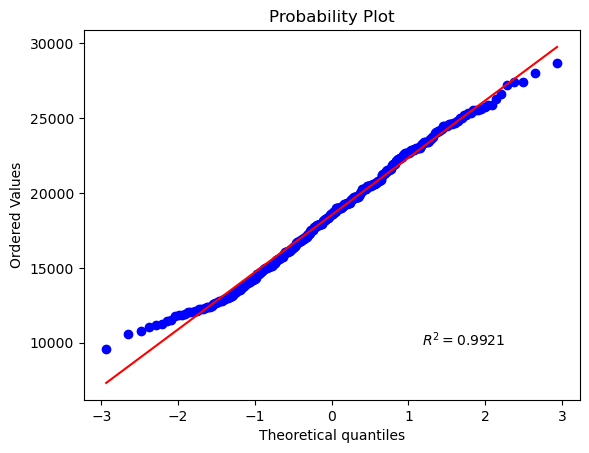

Bilirubin
Skewness: 2.717610708740455
Kurtosis: 8.065335678744502


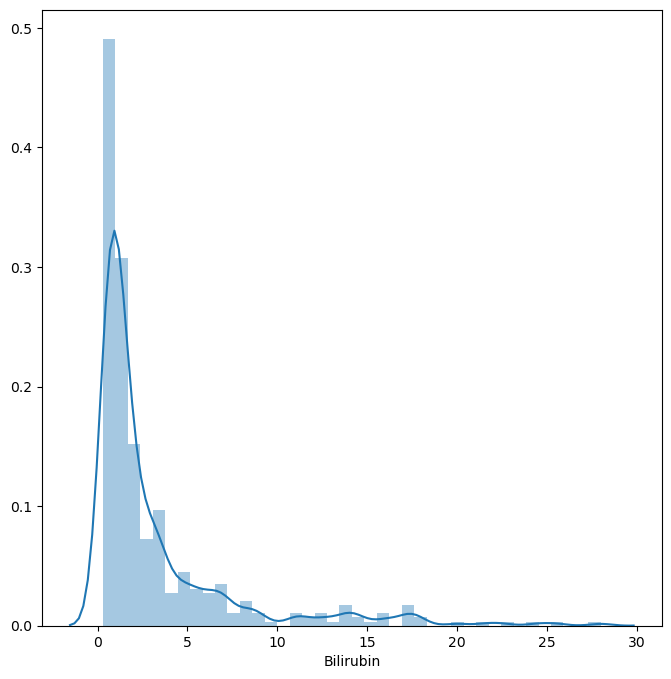

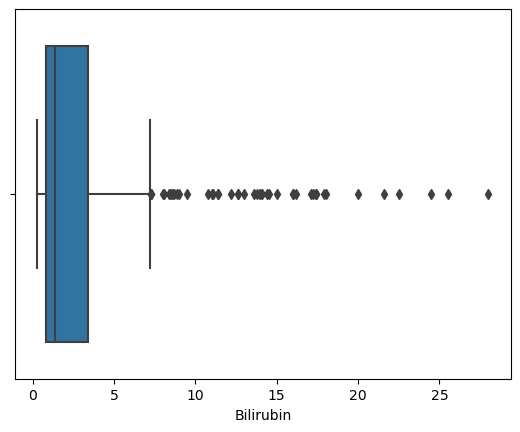

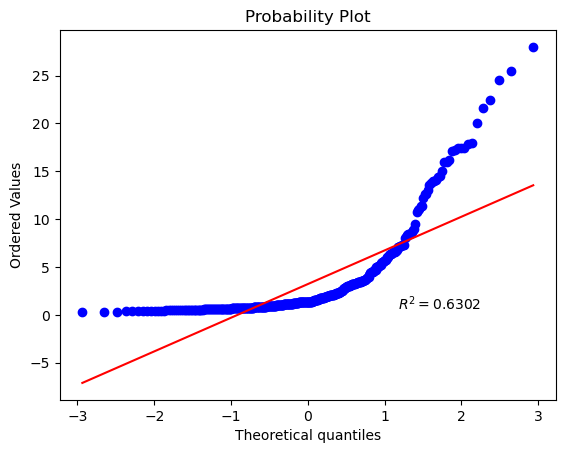

Cholesterol
Skewness: 3.408525855721416
Kurtosis: 14.337869865983716


ValueError: cannot convert float NaN to integer

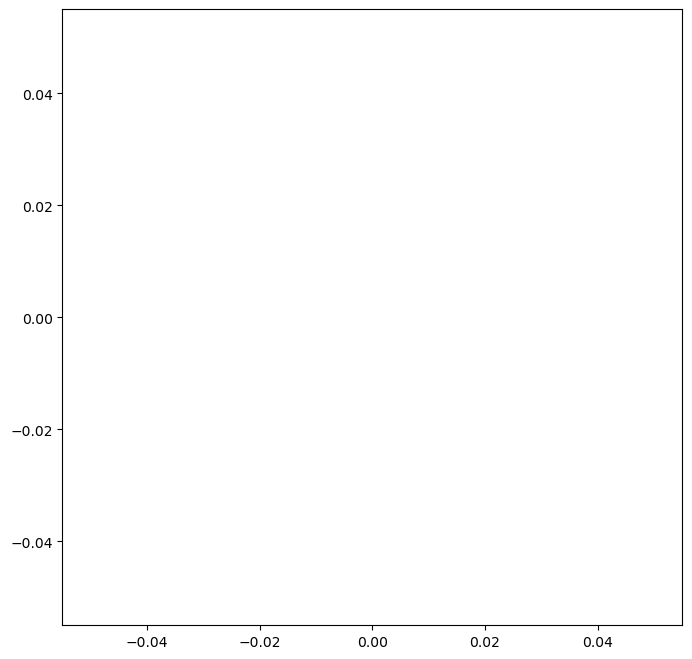

In [15]:
for col in df.columns:
    if df[col].dtypes != 'object':
        if col not in ['Stage']:
            print(col.title())
            print("Skewness:",df[col].skew())
            print("Kurtosis:",df[col].kurtosis())
            plt.figure(figsize=(8,8))
            sns.distplot(df[col])
            plt.show()
            sns.boxplot(df[col])
            plt.show()
            scipy.stats.probplot(df[col],plot=plt,rvalue=True)
            plt.show()


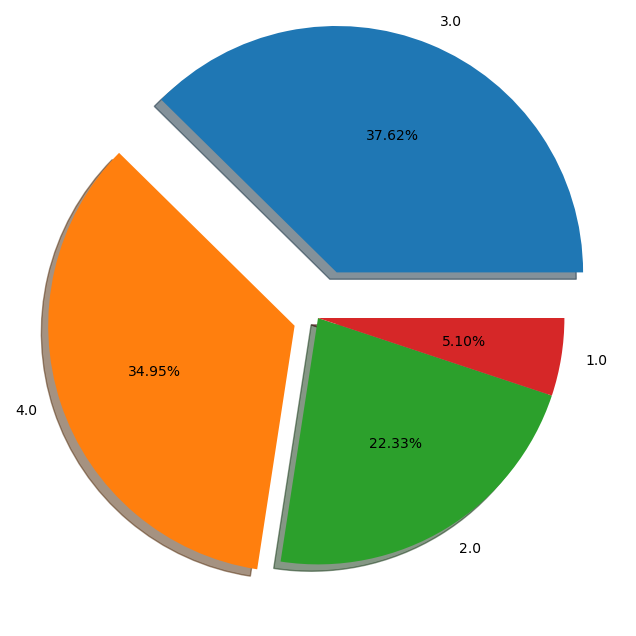

In [16]:
def pie_chart(df,col):
    labels = df[col].value_counts().keys()
    values = df[col].value_counts().values
    explode = [0]*np.size(labels)
    explode[0] = 0.2
    explode[1] = 0.1
    plt.figure(figsize=(8,8))
    plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
    plt.show()

pie_chart(df,'Stage')

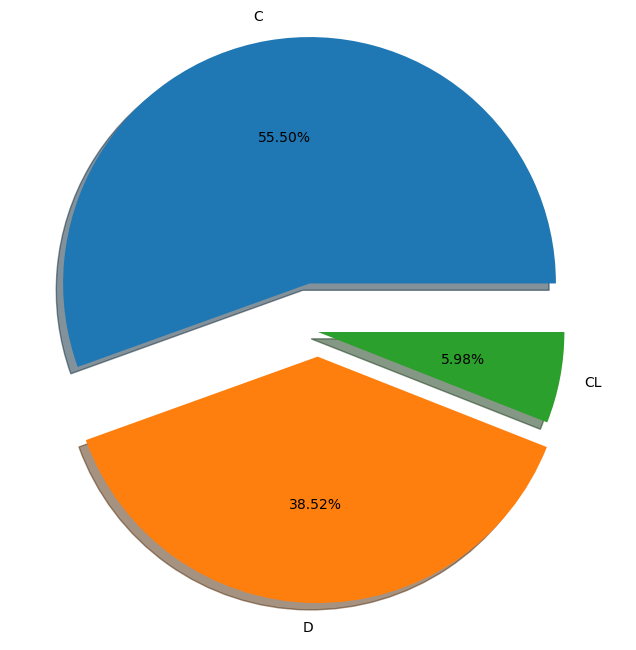

In [17]:
pie_chart(df,'Status')

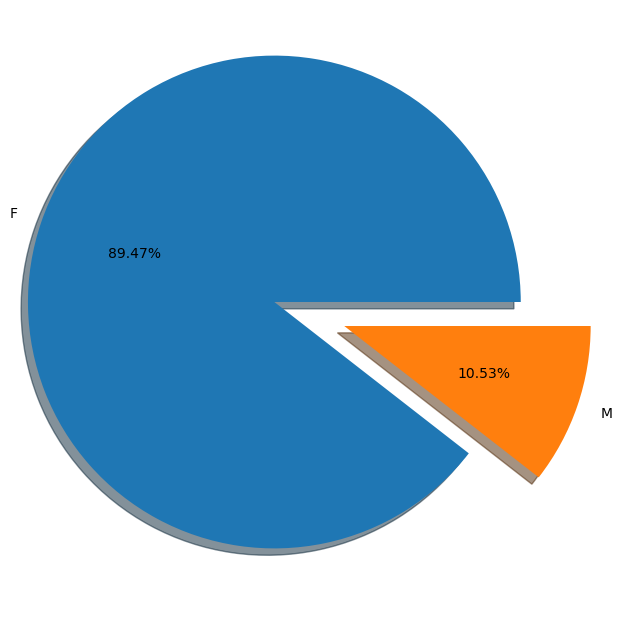

In [18]:
pie_chart(df,'Sex')

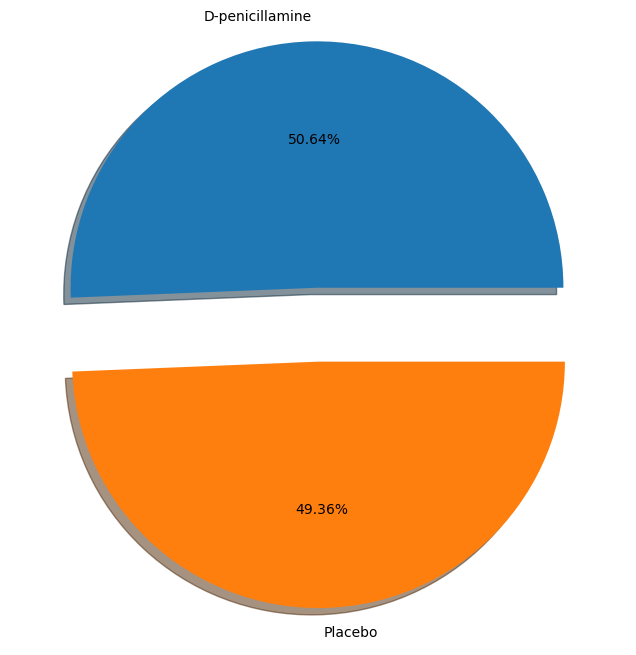

In [19]:
pie_chart(df,'Drug')

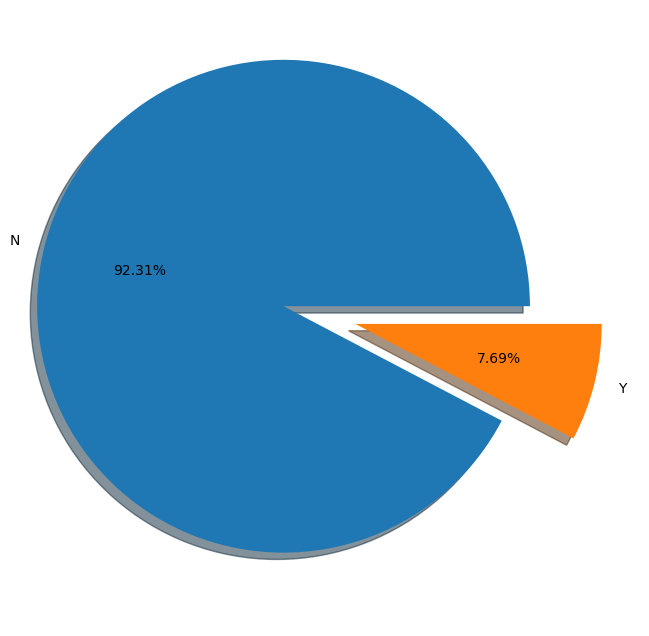

In [20]:
pie_chart(df,'Ascites')

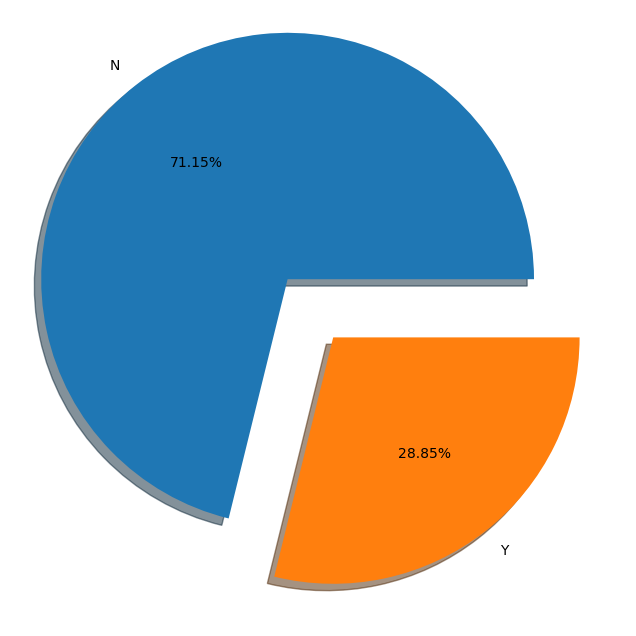

In [21]:
pie_chart(df,'Spiders')

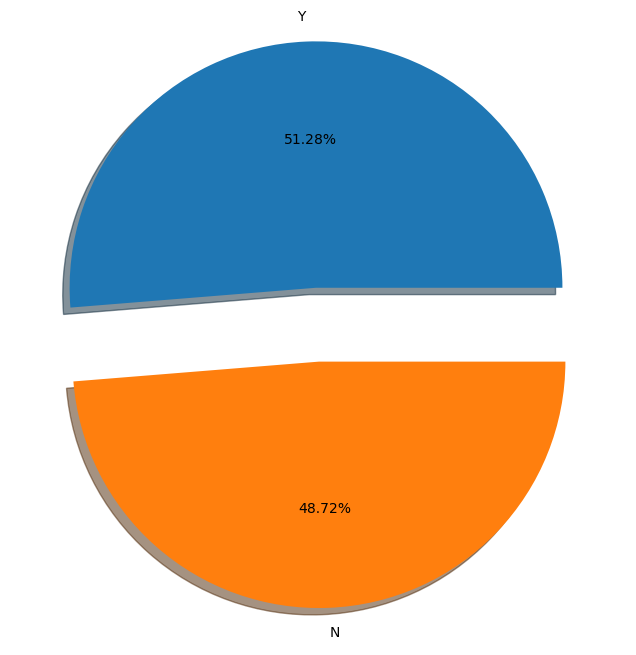

In [22]:
pie_chart(df,'Hepatomegaly')

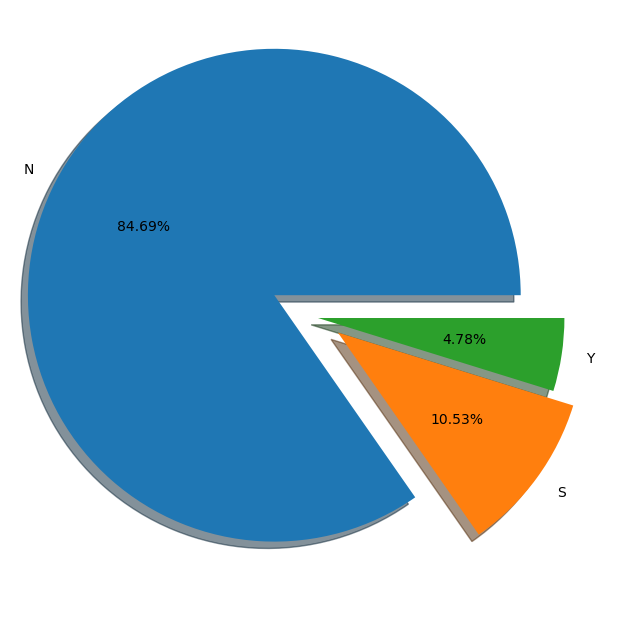

In [23]:
pie_chart(df,'Edema')

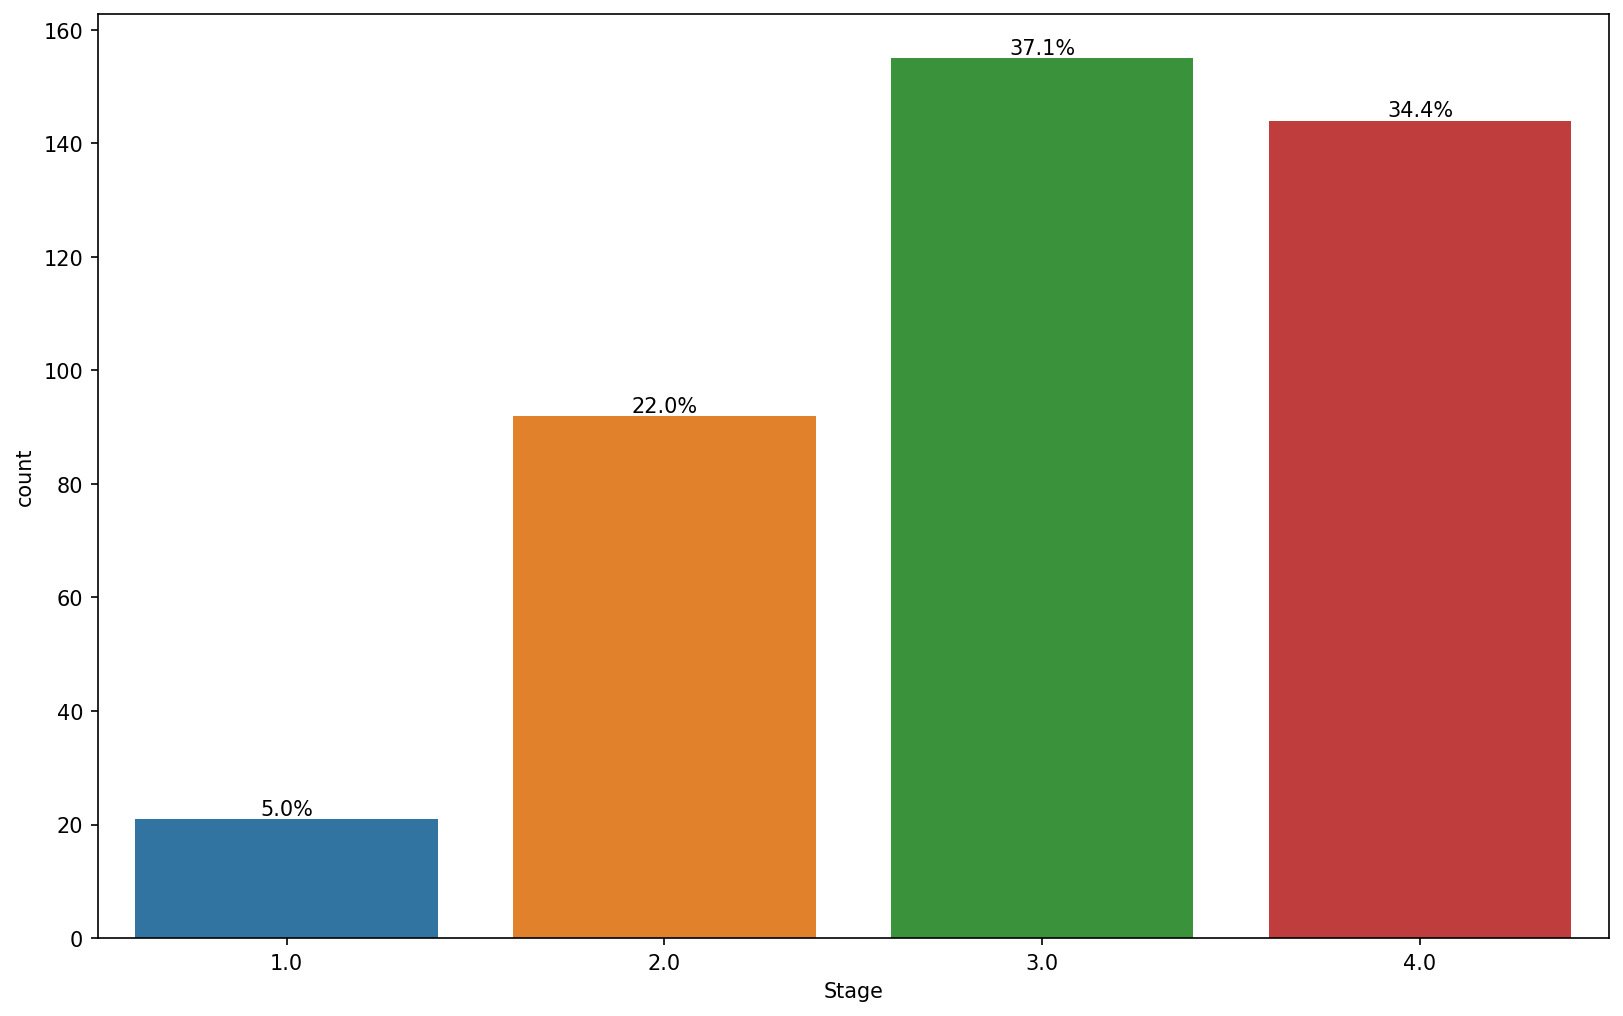

In [24]:
plt.figure(figsize=(13,8),dpi=150)
ax = sns.countplot(df.Stage)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')


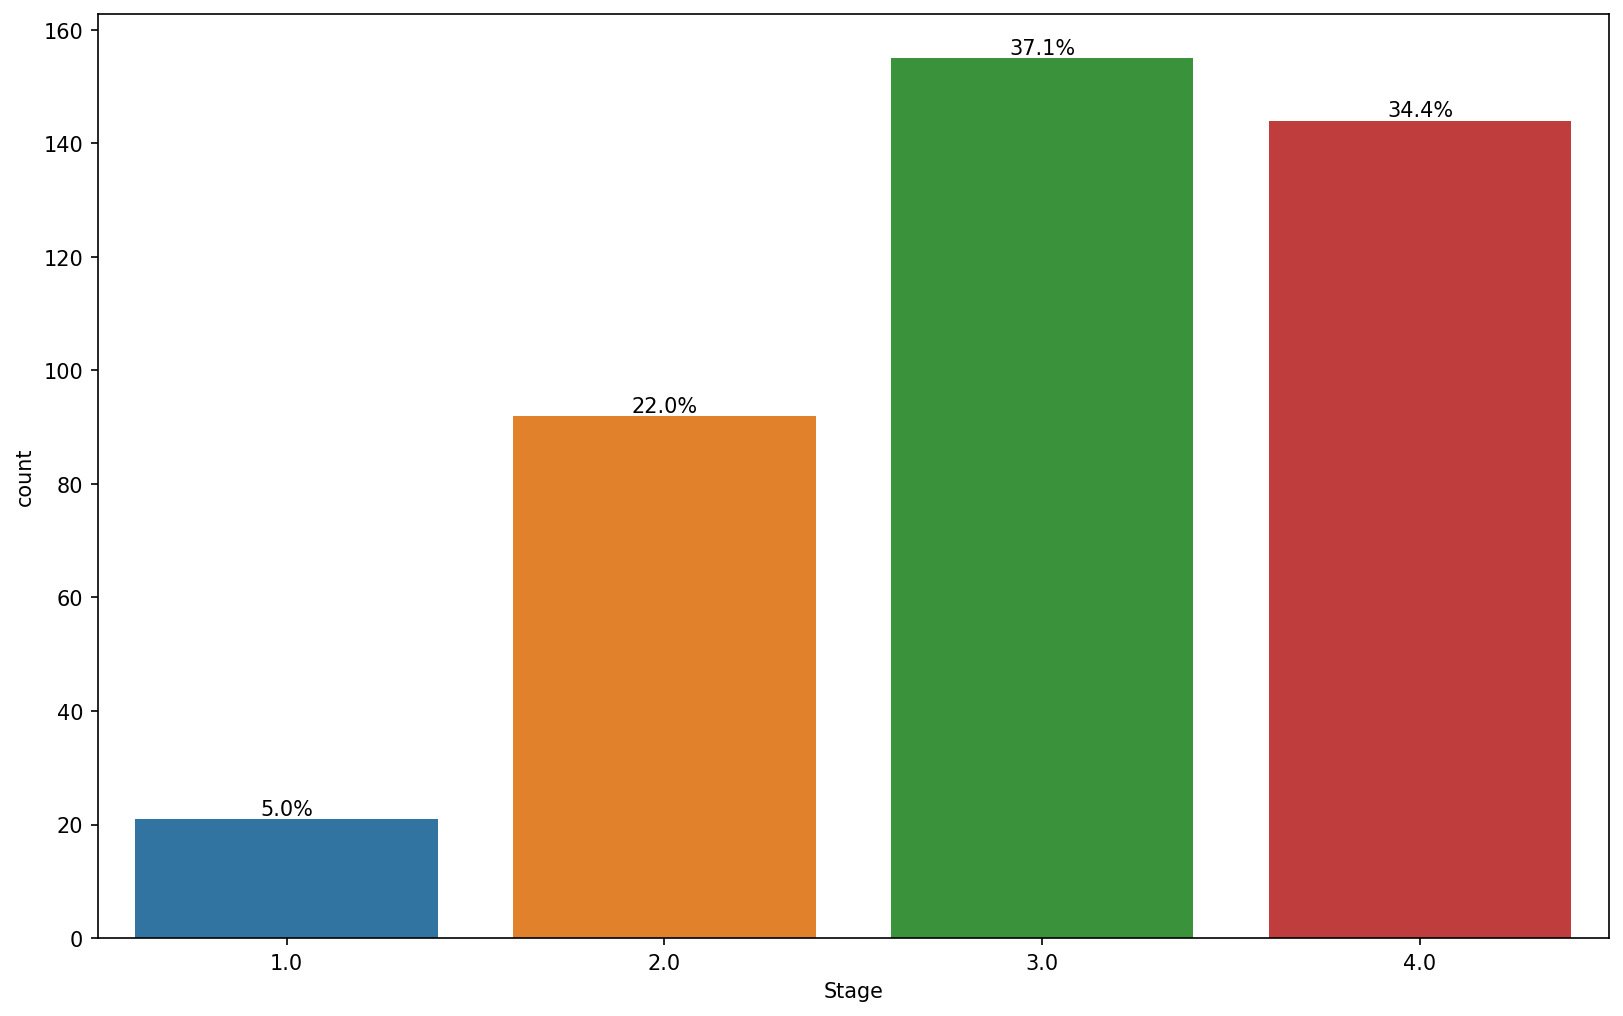

In [25]:
plt.figure(figsize=(13,8),dpi=150)
ax = sns.countplot(df.Stage)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')


In [26]:
males = df[df.Sex == 'M']
females = df[df.Sex == 'F']


In [27]:
males.describe()

females.describe()


N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   374.000000    374.000000  374.000000   249.000000  374.000000   
mean   1920.577540  18319.823529    3.262567   370.502008    3.493021   
std    1092.953174   3740.397415    4.591388   238.726563    0.421527   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1095.500000  15478.750000    0.700000   252.000000    3.240000   
50%    1773.000000  18333.000000    1.300000   309.000000    3.520000   
75%    2606.250000  20819.000000    3.400000   395.000000    3.767500   
max    4795.000000  28018.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  274.000000    276.000000  276.000000     247.000000  364.000000   
mean    90.208029   1957.834783  122.630145     123.465587  260.082418   
std     80.738377   2105.049047   57.916646      66.780963   99.418385   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     40.000000    877.500000   80.600000      84.000000  190.000000   
50%     67.000000   1270.500000  113.335000     106.000000  252.500000   
75%    111.750000   1963.750000  151.900000     146.000000  319.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   372.000000  368.000000  
mean     10.706989    3.019022  
std       1.030534    0.877926  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

In [28]:
round(males.Status.value_counts() / len(males) * 100,2)

D     54.55
C     38.64
CL     6.82
Name: Status, dtype: float64

In [29]:
round(females.Status.value_counts() / len(females) * 100,2)

C     57.49
D     36.63
CL     5.88
Name: Status, dtype: float64

In [30]:
round(males.Stage.value_counts() / len(males) * 100,2)

round(females.Stage.value_counts() / len(females) * 100,2)


3.0    37.17
4.0    33.96
2.0    22.46
1.0     4.81
Name: Stage, dtype: float64

In [31]:
round(males.Hepatomegaly.value_counts() / len(males) * 100,2)

round(females.Hepatomegaly.value_counts() / len(females) * 100,2)


Y    37.17
N    36.63
Name: Hepatomegaly, dtype: float64

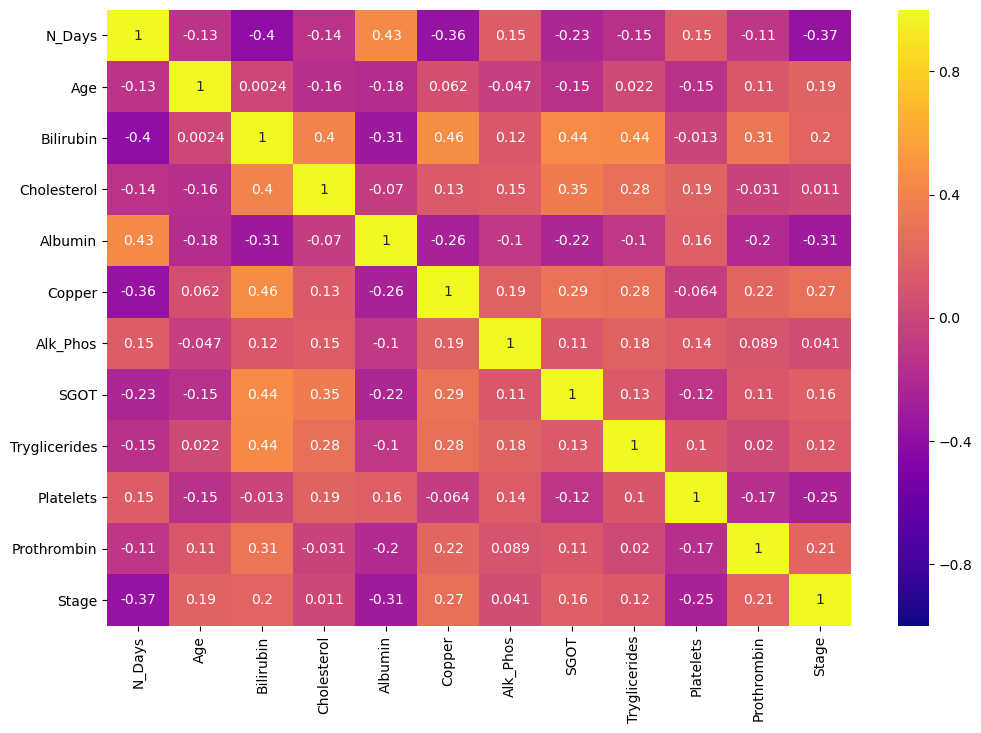

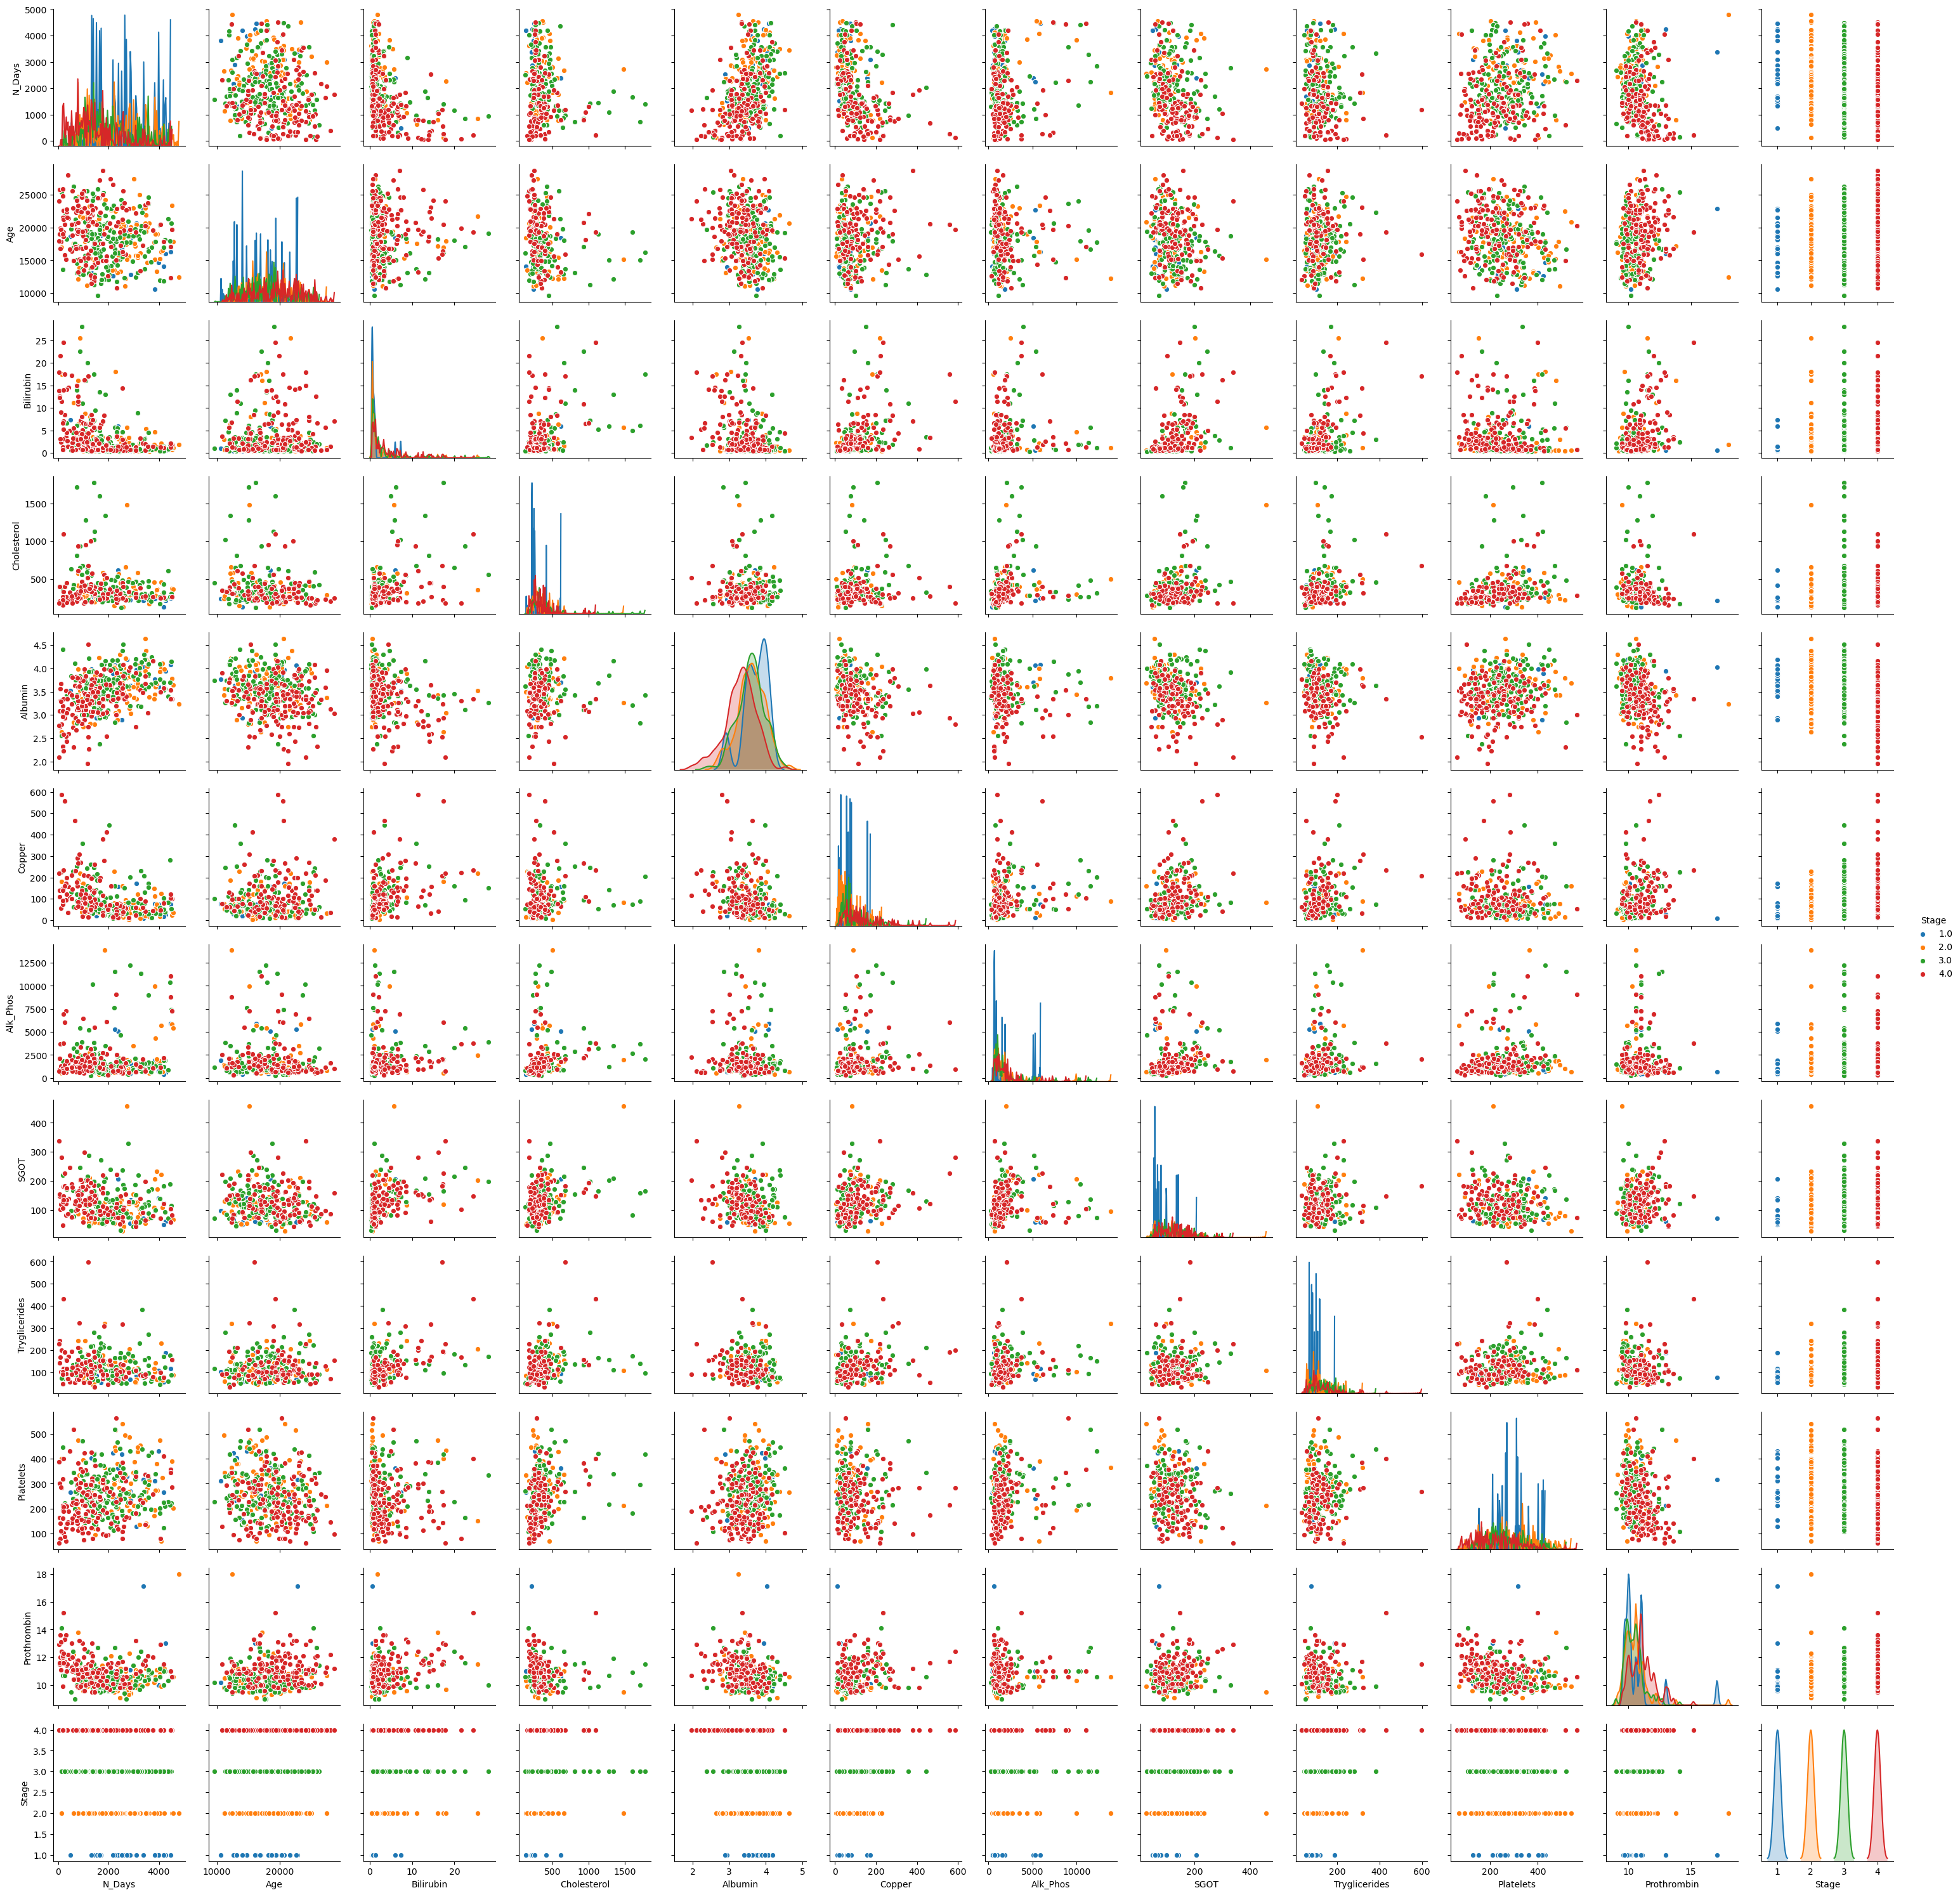

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a specific bandwidth value for KDE estimation
diag_kws = dict(bw=0.1)  # You can adjust the bandwidth value as needed

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='plasma', vmin=-1, vmax=1)

# There are no major correlations between any pair of features in the dataset.

# Plot pairplot with specific bandwidth
sns.pairplot(df, hue='Stage', diag_kws=diag_kws)


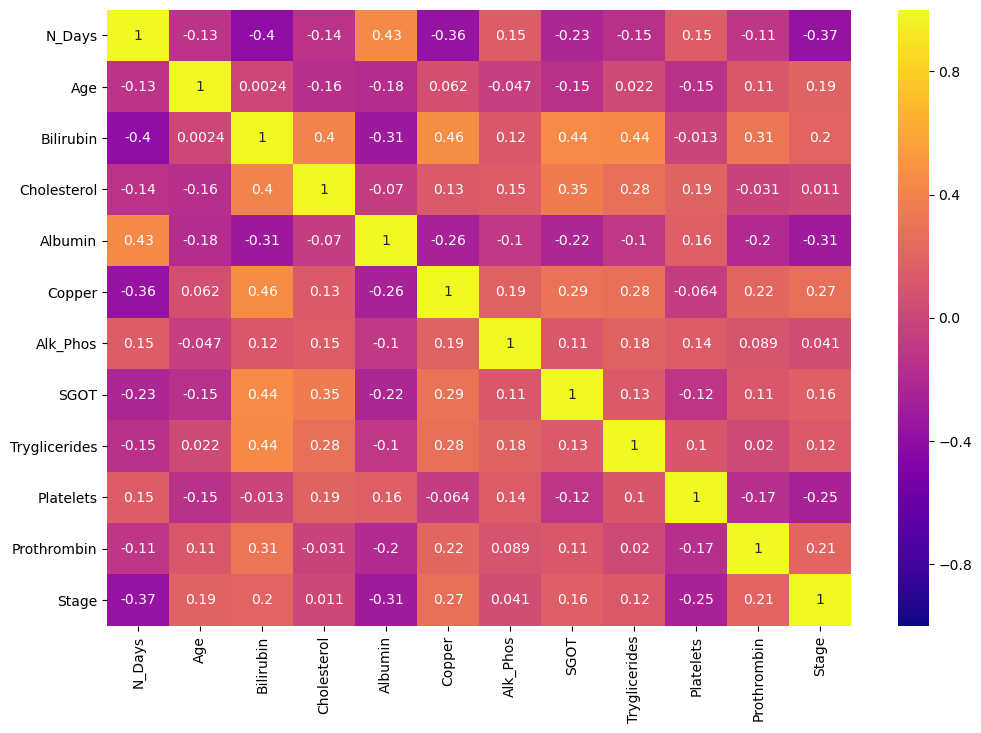

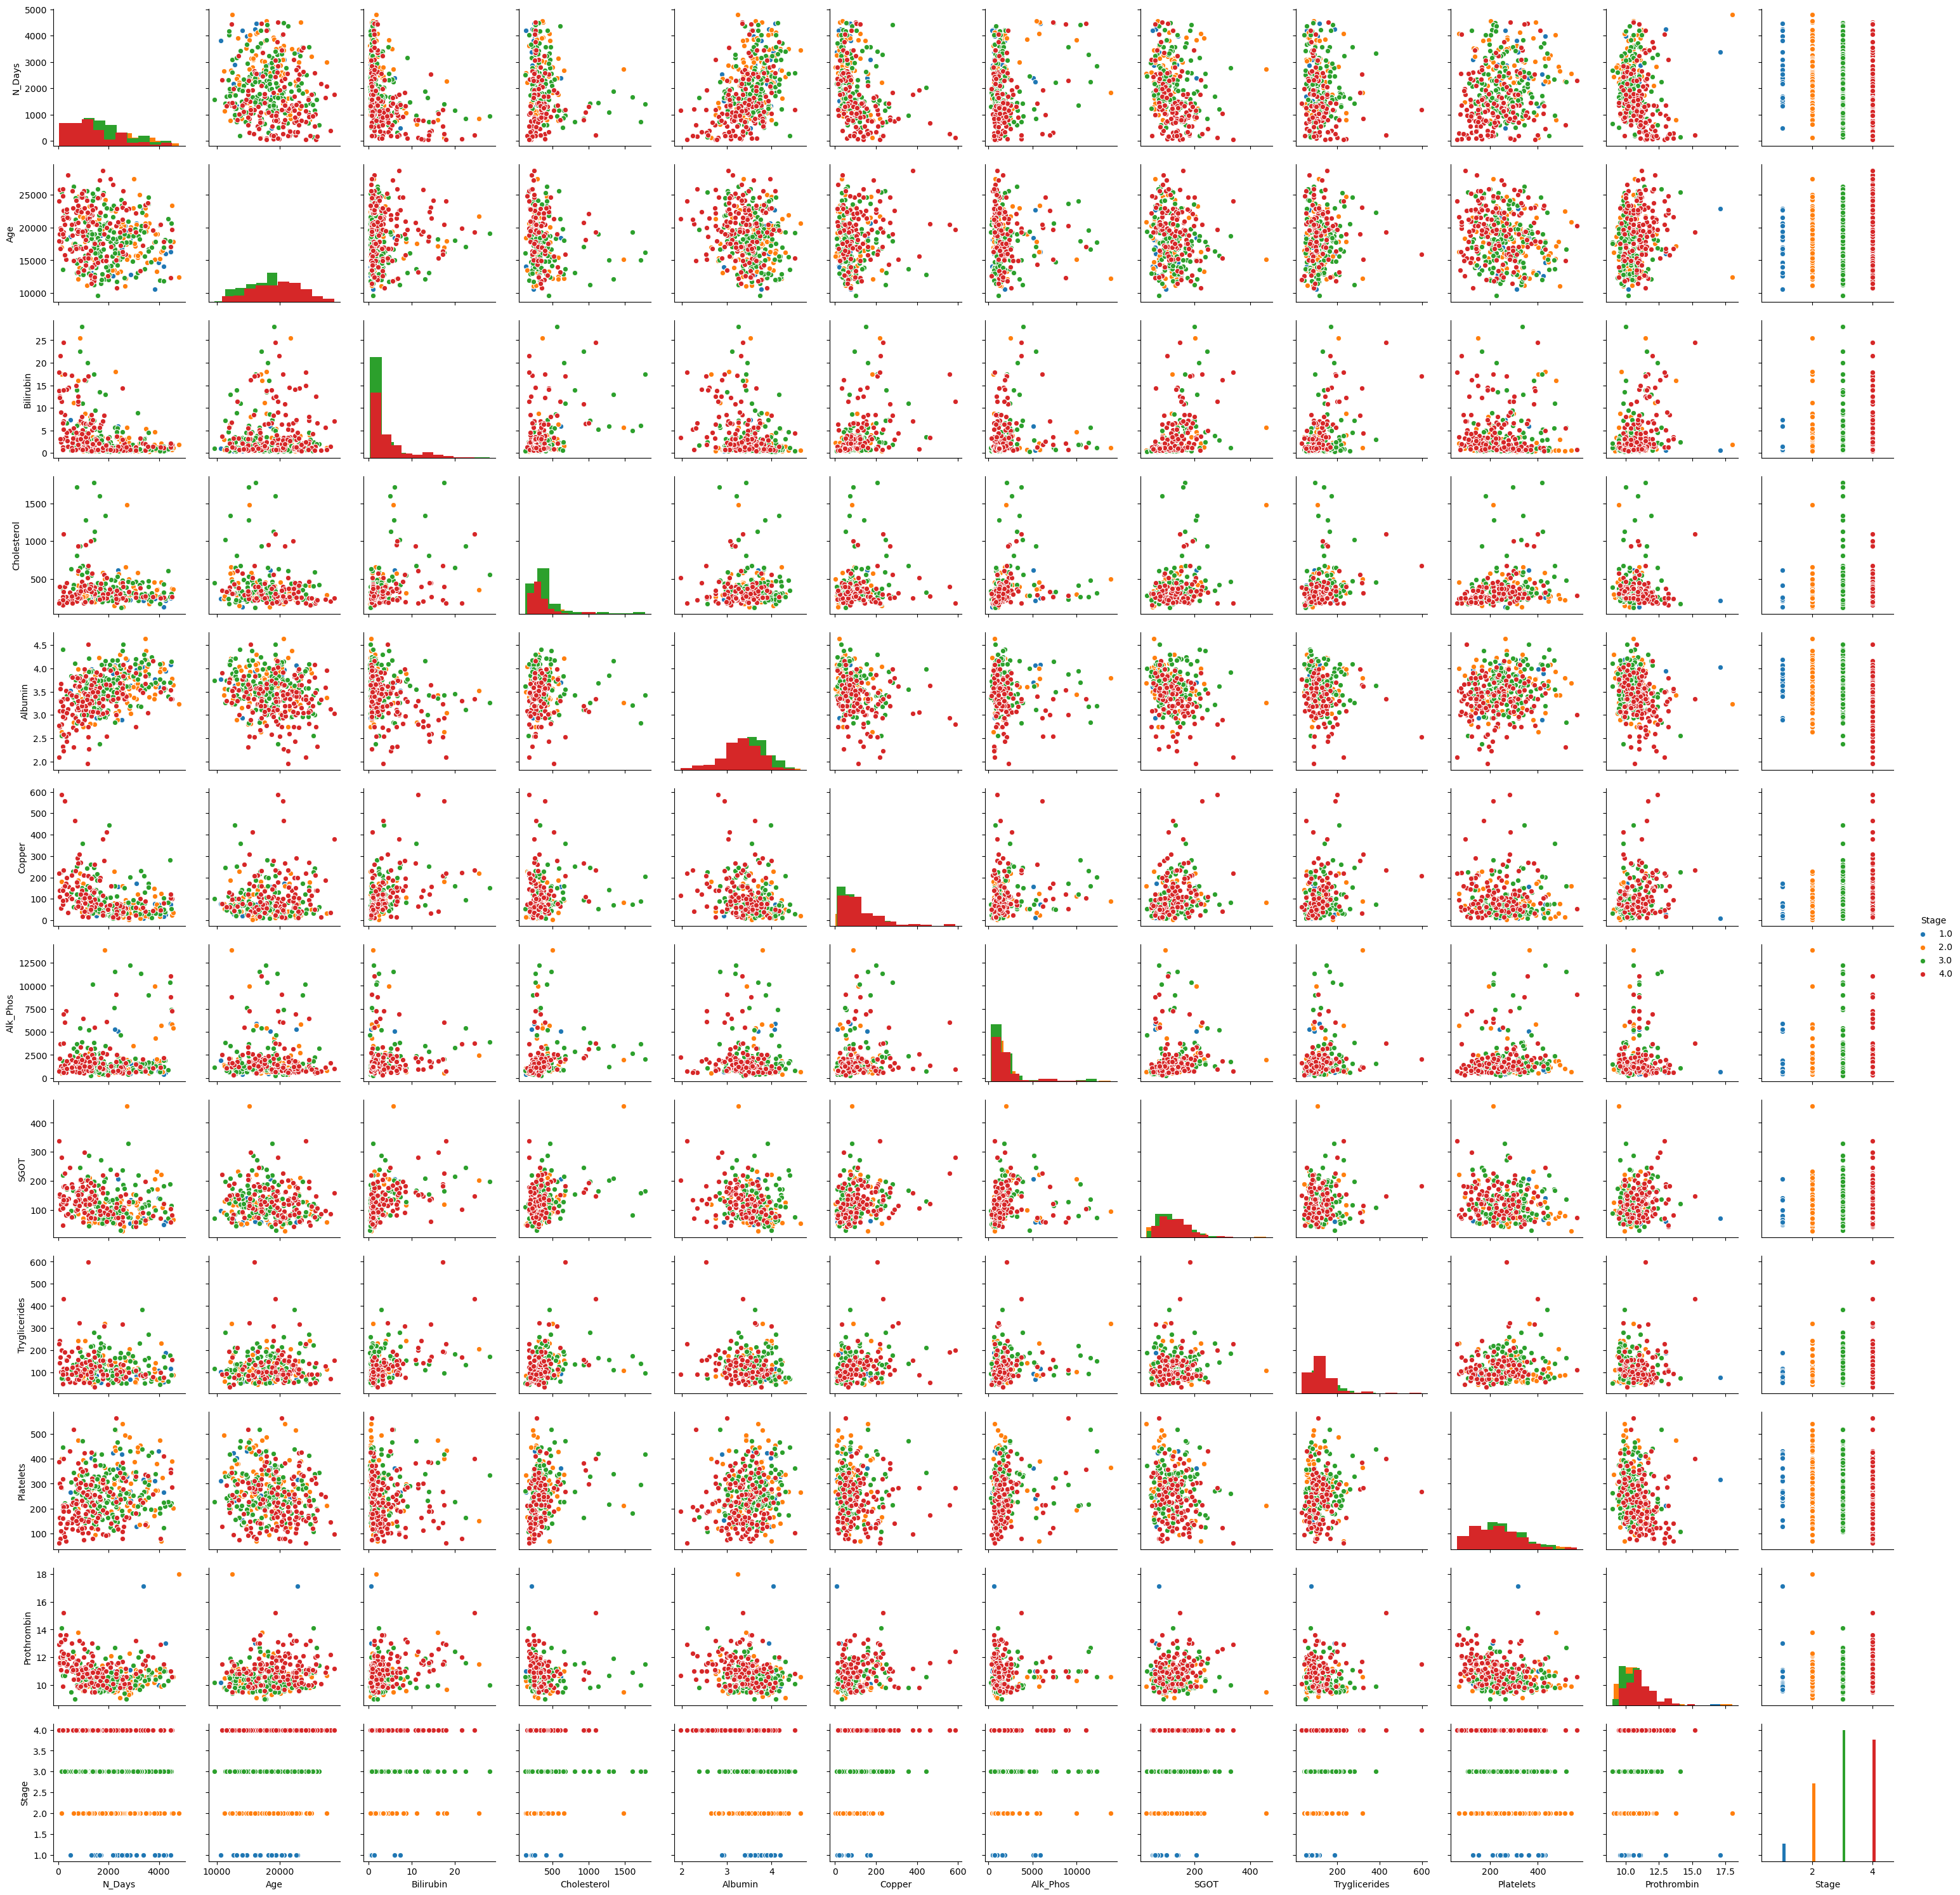

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='plasma', vmin=-1, vmax=1)

# There are no major correlations between any pair of features in the dataset.

# Plot pairplot with histogram instead of KDE for diagonal plots
sns.pairplot(df, hue='Stage', diag_kind='hist')

In [37]:
#Feature Engineering
df.Age = (df.Age.values/365.0).round()
df.head()


N_Days Status             Drug   Age Sex Ascites Hepatomegaly Spiders  \
0     400      D  D-penicillamine  59.0   F       Y            Y       Y   
1    4500      C  D-penicillamine  56.0   F       N            Y       Y   
2    1012      D  D-penicillamine  70.0   M       N            N       N   
3    1925      D  D-penicillamine  55.0   F       N            Y       Y   
4    1504     CL          Placebo  38.0   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [38]:
#Imputation of missing values


for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)


In [39]:
#Treatment of outliers


for col in df.columns:
    if df[col].dtypes != 'object':
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))


In [40]:
#Encoding of categorical features

df.Sex.replace(['M','F'],[1,0],inplace=True)
df.Sex = df.Sex.astype(np.float64)
df.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
df.Edema = df.Edema.astype(np.float64)
df.Ascites.replace(['Y','N'],[1,0],inplace=True)
df.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
df.Spiders.replace(['Y','N'],[1,0],inplace=True)
df.Ascites = df.Ascites.astype(np.float64)
df.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
df.Spiders = df.Spiders.astype(np.float64)
df.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
df.Drug = df.Drug.astype(np.float64)
df.Stage = df.Stage.astype(np.int64)


In [41]:
#Separating the independent predictor features and the target label
#We will not be using 'Status' and 'N_days' as our features since they will cause #data leakage.

X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage


<AxesSubplot:xlabel='Stage', ylabel='count'>

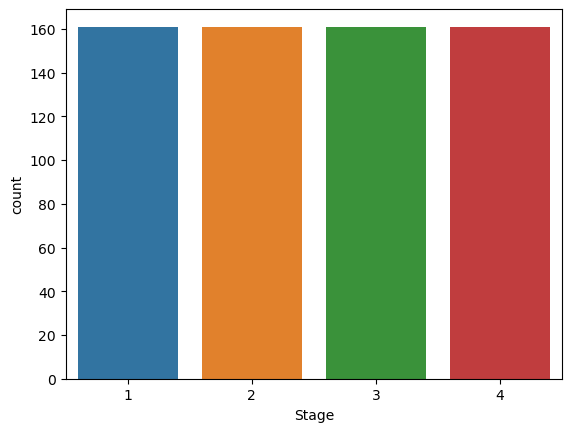

In [42]:
#Balancing the imbalanced target column "Stage" using Synthetic Minority Over-
#Sampling Technique(SMOTE)
smote = SMOTE()
X,y = smote.fit_resample(X,y)

sns.countplot(y)


In [43]:
#Feature Scaling

scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

Drug       Age       Sex   Ascites  Hepatomegaly   Spiders     Edema  \
0 -0.736556  0.932737 -0.393470  4.714009      0.943146  2.219253  3.109457   
1 -0.736556  0.622995 -0.393470 -0.227415      0.943146  2.219253  0.158336   
2 -0.736556  2.068456  2.956699 -0.227415     -1.119998 -0.488469 -2.792786   
3 -0.736556  0.519748 -0.393470 -0.227415      0.943146  2.219253 -2.792786   
4  1.522665 -1.235454 -0.393470 -0.227415      0.943146  2.219253  0.158336   

   Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0   2.412285    -0.659893 -2.458589  1.872779  0.574865  0.676863   
1  -0.524004    -0.086643  1.522336 -0.534276  2.189013  0.047711   
2  -0.381926    -1.848337 -0.183775  2.321152 -1.314332 -0.400910   
3  -0.192488    -0.897582 -2.613690 -0.298290  2.189013 -1.314377   
4   0.565264    -0.408222 -0.054524  1.565998 -1.070716  0.038183   

   Tryglicerides  Platelets  Prothrombin  
0       2.046076  -0.837294     1.899402  
1      -0.712451  -0.489367    -0.055931  
2      -1.796158  -1.275010     1.654986  
3      -0.581093  -0.915859    -0.422557  
4      -1.237885  -1.443362     0.310694

In [44]:
#Model Training & Evaluation
#Dividing the dataset into training and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


              precision    recall  f1-score   support

           1       0.57      0.74      0.64        50
           2       0.34      0.23      0.28        52
           3       0.38      0.46      0.42        39
           4       0.74      0.66      0.70        53

    accuracy                           0.53       194
   macro avg       0.51      0.52      0.51       194
weighted avg       0.52      0.53      0.52       194



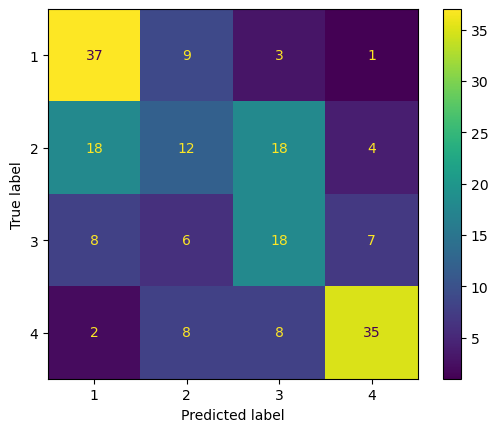

In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

y_pred = logmodel.predict(X_test)
print(classification_report(y_test,y_pred))


plot_confusion_matrix(logmodel,X_test,y_test)


              precision    recall  f1-score   support

           1       0.62      0.80      0.70        50
           2       0.55      0.42      0.48        52
           3       0.38      0.46      0.41        39
           4       0.71      0.57      0.63        53

    accuracy                           0.57       194
   macro avg       0.57      0.56      0.56       194
weighted avg       0.58      0.57      0.56       194



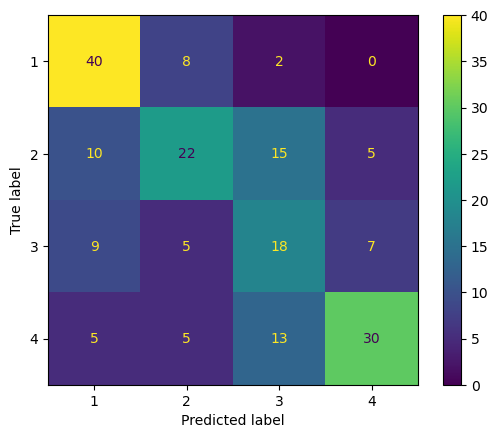

In [46]:
svm = SVC()
svm.fit(X_train,y_train)

svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))


plot_confusion_matrix(svm,X_test,y_test)



Text(0, 0.5, 'Accuracy Score')

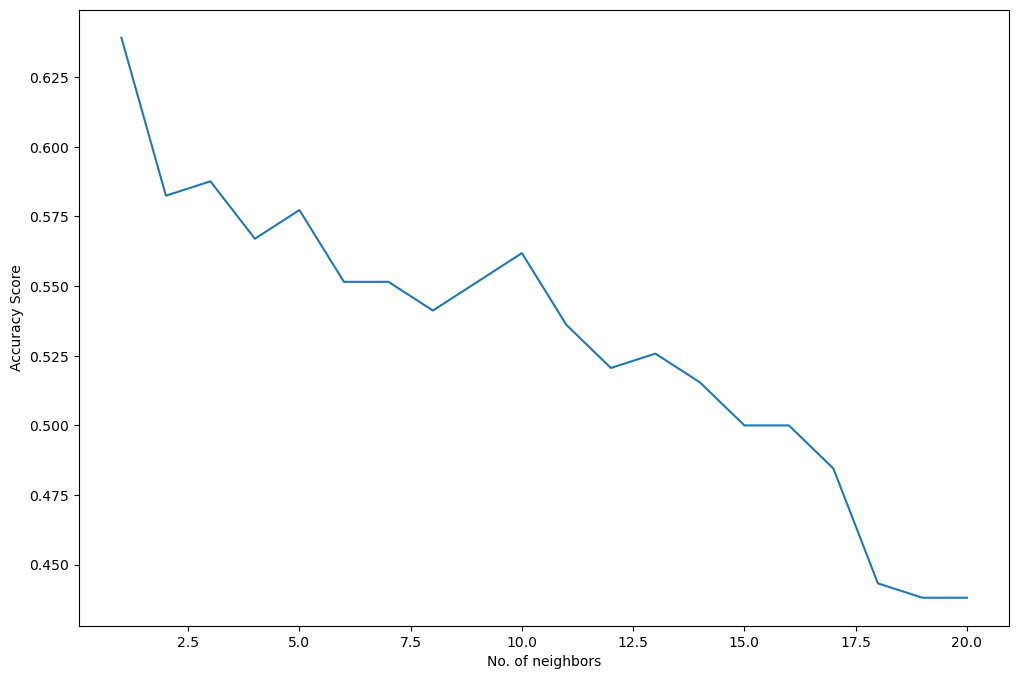

In [47]:
scores = []
for i in np.arange(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
    
plt.figure(figsize=(12,8))
sns.lineplot(np.arange(1,21),scores)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')

In [48]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))


[[46  3  1  0]
 [26 13  9  4]
 [14  8 12  5]
 [12  7 11 23]]
              precision    recall  f1-score   support

           1       0.47      0.92      0.62        50
           2       0.42      0.25      0.31        52
           3       0.36      0.31      0.33        39
           4       0.72      0.43      0.54        53

    accuracy                           0.48       194
   macro avg       0.49      0.48      0.45       194
weighted avg       0.50      0.48      0.46       194



In [49]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test,sgd_pred))
print(classification_report(y_test,sgd_pred))


[[31 14  2  3]
 [17 15 11  9]
 [ 7 12 10 10]
 [ 3  5 15 30]]
              precision    recall  f1-score   support

           1       0.53      0.62      0.57        50
           2       0.33      0.29      0.31        52
           3       0.26      0.26      0.26        39
           4       0.58      0.57      0.57        53

    accuracy                           0.44       194
   macro avg       0.43      0.43      0.43       194
weighted avg       0.44      0.44      0.44       194



In [50]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)


pac_pred = pac.predict(X_test)
print(confusion_matrix(y_test,pac_pred))
print(classification_report(y_test,pac_pred))


[[23 24  3  0]
 [ 7 17 24  4]
 [ 6 15 16  2]
 [ 1 15 20 17]]
              precision    recall  f1-score   support

           1       0.62      0.46      0.53        50
           2       0.24      0.33      0.28        52
           3       0.25      0.41      0.31        39
           4       0.74      0.32      0.45        53

    accuracy                           0.38       194
   macro avg       0.46      0.38      0.39       194
weighted avg       0.48      0.38      0.40       194



In [51]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)
print(confusion_matrix(y_test,ridge_pred))
print(classification_report(y_test,ridge_pred))



[[37  5  7  1]
 [25  8 16  3]
 [10  3 16 10]
 [ 3  7  8 35]]
              precision    recall  f1-score   support

           1       0.49      0.74      0.59        50
           2       0.35      0.15      0.21        52
           3       0.34      0.41      0.37        39
           4       0.71      0.66      0.69        53

    accuracy                           0.49       194
   macro avg       0.47      0.49      0.47       194
weighted avg       0.48      0.49      0.47       194



In [52]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))


[[42  3  4  1]
 [11 17 13 11]
 [ 6  4 17 12]
 [ 3  7 16 27]]
              precision    recall  f1-score   support

           1       0.68      0.84      0.75        50
           2       0.55      0.33      0.41        52
           3       0.34      0.44      0.38        39
           4       0.53      0.51      0.52        53

    accuracy                           0.53       194
   macro avg       0.52      0.53      0.52       194
weighted avg       0.53      0.53      0.52       194



Text(0, 0.5, 'Accuracy Score')

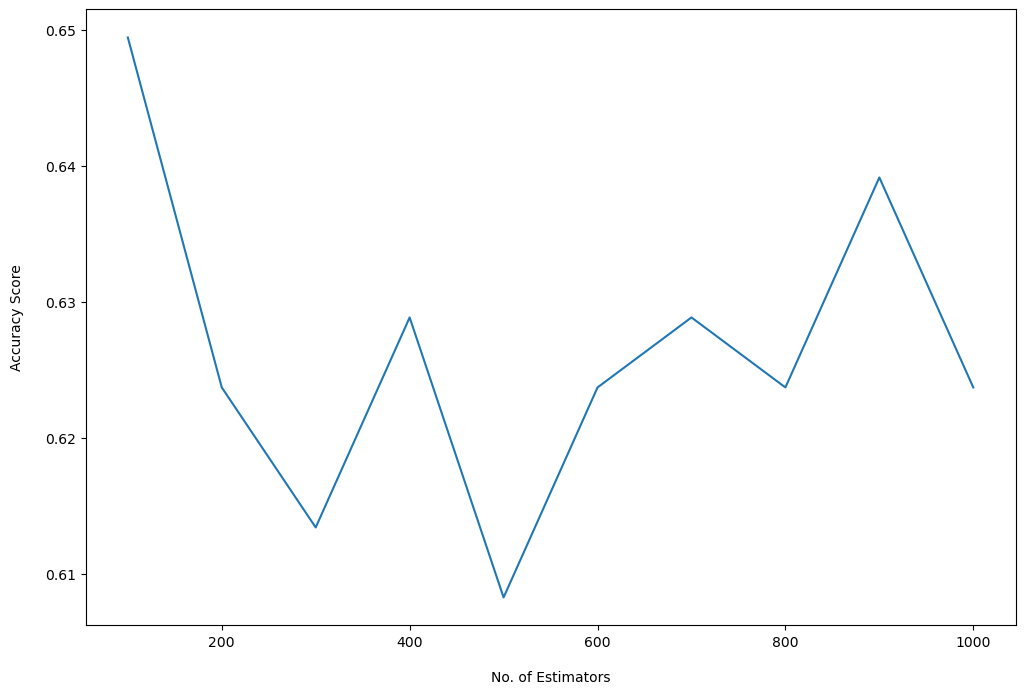

In [53]:
scores = []
for i in np.arange(100,1001,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    scores.append(rf.score(X_test,y_test))

plt.figure(figsize=(12,8))
sns.lineplot(np.arange(100,1001,100),scores)
plt.xlabel('No. of Estimators',labelpad=15)
plt.ylabel('Accuracy Score',labelpad=15)

In [54]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))


[[47  3  0  0]
 [ 7 24 16  5]
 [ 6  5 21  7]
 [ 0  5 18 30]]
              precision    recall  f1-score   support

           1       0.78      0.94      0.85        50
           2       0.65      0.46      0.54        52
           3       0.38      0.54      0.45        39
           4       0.71      0.57      0.63        53

    accuracy                           0.63       194
   macro avg       0.63      0.63      0.62       194
weighted avg       0.65      0.63      0.63       194



<AxesSubplot:xlabel='Importance', ylabel='Feature'>

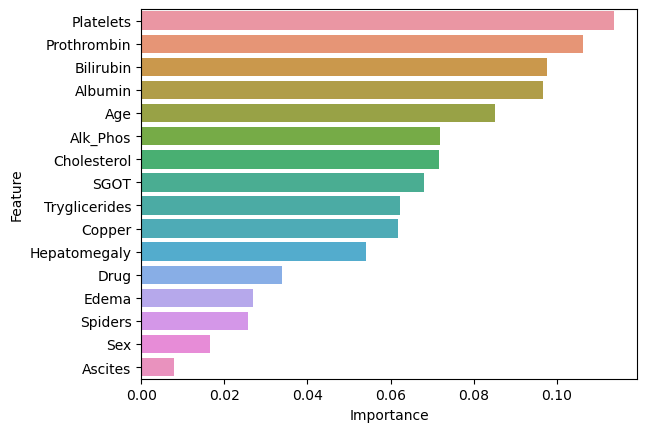

In [55]:
feature_importances = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
feature_importances.columns = ['Feature','Importance']
feature_importances = feature_importances.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='h')


In [56]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

et_pred = et.predict(X_test)
print(confusion_matrix(y_test,et_pred))
print(classification_report(y_test,et_pred))


[[48  1  1  0]
 [ 8 28 13  3]
 [ 5  6 19  9]
 [ 1  5 19 28]]
              precision    recall  f1-score   support

           1       0.77      0.96      0.86        50
           2       0.70      0.54      0.61        52
           3       0.37      0.49      0.42        39
           4       0.70      0.53      0.60        53

    accuracy                           0.63       194
   macro avg       0.63      0.63      0.62       194
weighted avg       0.65      0.63      0.63       194



In [57]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

abc_pred = abc.predict(X_test)
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))


[[41  8  1  0]
 [11 26  9  6]
 [ 5  7 15 12]
 [ 1 15 12 25]]
              precision    recall  f1-score   support

           1       0.71      0.82      0.76        50
           2       0.46      0.50      0.48        52
           3       0.41      0.38      0.39        39
           4       0.58      0.47      0.52        53

    accuracy                           0.55       194
   macro avg       0.54      0.54      0.54       194
weighted avg       0.55      0.55      0.55       194



In [58]:
cb = CatBoostClassifier()
cb.fit(X_train,y_train)

cb_pred = cb.predict(X_test)
print(confusion_matrix(y_test,cb_pred))
print(classification_report(y_test,cb_pred))


Learning rate set to 0.075969
0:	learn: 1.3562849	total: 159ms	remaining: 2m 39s
1:	learn: 1.3339031	total: 164ms	remaining: 1m 22s
2:	learn: 1.3205153	total: 170ms	remaining: 56.4s
3:	learn: 1.3008651	total: 175ms	remaining: 43.6s
4:	learn: 1.2848810	total: 180ms	remaining: 35.8s
5:	learn: 1.2605264	total: 185ms	remaining: 30.7s
6:	learn: 1.2417938	total: 191ms	remaining: 27s
7:	learn: 1.2207249	total: 197ms	remaining: 24.4s
8:	learn: 1.2018651	total: 202ms	remaining: 22.3s
9:	learn: 1.1840339	total: 208ms	remaining: 20.6s
10:	learn: 1.1687897	total: 214ms	remaining: 19.2s
11:	learn: 1.1492565	total: 219ms	remaining: 18.1s
12:	learn: 1.1306181	total: 225ms	remaining: 17.1s
13:	learn: 1.1176532	total: 230ms	remaining: 16.2s
14:	learn: 1.1044712	total: 235ms	remaining: 15.5s
15:	learn: 1.0957609	total: 240ms	remaining: 14.8s
16:	learn: 1.0836947	total: 246ms	remaining: 14.2s
17:	learn: 1.0711055	total: 251ms	remaining: 13.7s
18:	learn: 1.0596082	total: 256ms	remaining: 13.2s
19:	learn: 

In [59]:
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train,y_train)

hgb_pred = hgb.predict(X_test)
print(confusion_matrix(y_test,hgb_pred))
print(classification_report(y_test,hgb_pred))


[[46  2  0  2]
 [ 6 24 15  7]
 [ 4  5 21  9]
 [ 1  5 13 34]]
              precision    recall  f1-score   support

           1       0.81      0.92      0.86        50
           2       0.67      0.46      0.55        52
           3       0.43      0.54      0.48        39
           4       0.65      0.64      0.65        53

    accuracy                           0.64       194
   macro avg       0.64      0.64      0.63       194
weighted avg       0.65      0.64      0.64       194



In [60]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

bag_pred = bag.predict(X_test)
print(confusion_matrix(y_test,bag_pred))
print(classification_report(y_test,bag_pred))


[[49  0  1  0]
 [10 26 11  5]
 [ 9  7 18  5]
 [ 5  4 19 25]]
              precision    recall  f1-score   support

           1       0.67      0.98      0.80        50
           2       0.70      0.50      0.58        52
           3       0.37      0.46      0.41        39
           4       0.71      0.47      0.57        53

    accuracy                           0.61       194
   macro avg       0.61      0.60      0.59       194
weighted avg       0.63      0.61      0.60       194



In [61]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

gnb_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))


[[50  0  0  0]
 [46  0  5  1]
 [27  0  9  3]
 [30  0  5 18]]
              precision    recall  f1-score   support

           1       0.33      1.00      0.49        50
           2       0.00      0.00      0.00        52
           3       0.47      0.23      0.31        39
           4       0.82      0.34      0.48        53

    accuracy                           0.40       194
   macro avg       0.40      0.39      0.32       194
weighted avg       0.40      0.40      0.32       194



In [62]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

gbc_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))


[[47  1  1  1]
 [ 7 22 18  5]
 [ 5  5 18 11]
 [ 2  4 16 31]]
              precision    recall  f1-score   support

           1       0.77      0.94      0.85        50
           2       0.69      0.42      0.52        52
           3       0.34      0.46      0.39        39
           4       0.65      0.58      0.61        53

    accuracy                           0.61       194
   macro avg       0.61      0.60      0.59       194
weighted avg       0.63      0.61      0.61       194



In [63]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)


lgbm_pred = lgbm.predict(X_test)
print(confusion_matrix(y_test,lgbm_pred))
print(classification_report(y_test,lgbm_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 16
[LightGBM] [Info] Start training from score -1.399717
[LightGBM] [Info] Start training from score -1.417900
[LightGBM] [Info] Start training from score -1.305227
[LightGBM] [Info] Start training from score -1.427116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [64]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

bnb_pred = bnb.predict(X_test)
print(confusion_matrix(y_test,bnb_pred))
print(classification_report(y_test,bnb_pred))


[[35 13  1  1]
 [22  6 14 10]
 [10  6 17  6]
 [ 2  7 15 29]]
              precision    recall  f1-score   support

           1       0.51      0.70      0.59        50
           2       0.19      0.12      0.14        52
           3       0.36      0.44      0.40        39
           4       0.63      0.55      0.59        53

    accuracy                           0.45       194
   macro avg       0.42      0.45      0.43       194
weighted avg       0.43      0.45      0.43       194



In [65]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

bnb_pred = bnb.predict(X_test)
print(confusion_matrix(y_test,bnb_pred))
print(classification_report(y_test,bnb_pred))



[[35 13  1  1]
 [22  6 14 10]
 [10  6 17  6]
 [ 2  7 15 29]]
              precision    recall  f1-score   support

           1       0.51      0.70      0.59        50
           2       0.19      0.12      0.14        52
           3       0.36      0.44      0.40        39
           4       0.63      0.55      0.59        53

    accuracy                           0.45       194
   macro avg       0.42      0.45      0.43       194
weighted avg       0.43      0.45      0.43       194



In [ ]:
#Model Performance Analysis
import numpy as np



print("Accuracy Score of Logistic Regression:",str(np.round(logmodel.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Passive Aggressive Classifier:",str(np.round(pac.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of SGD Classifer:",str(np.round(sgd.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ridge Classifier:",str(np.round(ridge.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(gnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bernoulli Naive Bayes:",str(np.round(bnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of K Neighbors Classifier:",str(np.round(knn.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Support Vector Classifier:",str(np.round(svm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rf.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of XG Boost Classifier:",str(np.round(xgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Cat Boost Classifier:",str(np.round(cb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gradient Boosting Classifier:",str(np.round(gbc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Histogram Gradient Boosting Classifier:",str(np.round(hgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bagging Classifier:",str(np.round(bag.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ada Boost Classifier:",str(np.round(abc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(et.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Light GBM Classifier:",str(np.round(lgbm.score(X_test,y_test)*100,2)) + '%')

